In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv (r'MuseumFile2018_File1_Nulls.csv')
df = pd.DataFrame(df, columns= ['MID', 'DISCIPL', 'COMMONNAME', 'LEGALNAME', 'ALTNAME', 'PHSTREET', 'PHCITY', 'PHSTATE', 
                                  'PHZIP5', 'INCOMECD15','LONGITUDE', 'LATITUDE', 'AAMREG', 'LOCALE4'])
df['PHZIP5'].replace(' ', np.nan, inplace=True)
df.dropna(subset=['PHZIP5'], inplace=True)
df.shape




(2064, 14)

In [2]:
zipDf = pd.read_csv (r'ZIP_codes_2018.csv')
zipDf = pd.DataFrame(zipDf, columns= ['ZIP Code', ' Median family income (2018) '])
zipDf = zipDf.rename(columns = {'ZIP Code':'PHZIP5'})
zipDf = zipDf.rename(columns = {' Median family income (2018) ':'MEDIAN_FAM_INCOME'})
zipDf



,PHZIP5,MEDIAN_FAM_INCOME
0,501,NaN
1,544,NaN
2,601,14433.0
3,602,19250.0
4,603,19718.0
...,...,...
41271,99926,65313.0
41272,99927,NaN
41273,99928,NaN
41274,99929,71923.0


In [3]:
df["PHZIP5"] = df["PHZIP5"].astype(str).astype(int)

In [4]:
finalDf = pd.merge(df, zipDf, on='PHZIP5', how='inner')
finalDf

,MID,DISCIPL,COMMONNAME,LEGALNAME,ALTNAME,PHSTREET,PHCITY,PHSTATE,PHZIP5,INCOMECD15,LONGITUDE,LATITUDE,AAMREG,LOCALE4,MEDIAN_FAM_INCOME
0,8400100026,ART,MOBILE MUSEUM OF ART,THE MOBILE MUSEUM OF ART INC,,4850 MUSEUM DR,MOBILE,AL,36689,6,-88.15462,30.70401,3,1,NaN
1,8400100029,ART,MONTGOMERY MUSEUM OF FINE ARTS,MONTGOMERY MUSEUM OF FINE ARTS ASSOCIATION,,ONE MUSEUM DRIVE,MONTGOMERY,AL,36117,6,-86.2087,32.3526,3,1,79386.0
2,8400100056,HST,HANK WILLIAMS SENIOR BOYHOOD HOME AND MUSEUM,HANK WILLIAMS MUSEUM AND FESTIVAL INC,,127 ROSE STREET,GEORGIANA,AL,36033,3,-86.74566,31.65737,3,4,45556.0
3,8400100065,ART,FAYETTE ART MUSEUM,FAYETTE ART MUSEUM,,203 TEMPLE AVE N,FAYETTE,AL,35555,,-87.83088,33.68726,3,3,47635.0
4,8400100094,HST,BIRMINGHAM HISTORY CENTER,BIRMINGHAM HISTORY CENTER,,1807 THIRD AVENUE NORTH,BIRMINGHAM,AL,35203,4,-86.80949,33.51496,3,1,42614.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,8409502648,BOT,WESTERN MARYLAND HOSPITAL CENTER THERAPEUTIC G...,WESTERN MARYLAND HOSPITAL CENTER THERAPEUTIC G...,,1500 PENNSYLVANIA AVE,HAGERSTOWN,MD,21742,,-77.71916,39.66854,2,1,84195.0
2055,8409502651,BOT,WILBUR D. MAY ARBORETUM & BOTANICAL GARDEN,WILBUR D. MAY ARBORETUM & BOTANICAL GARDEN,,1595 NORTH SIERRA STREET,RENO,NV,89503,,-119.8214,39.54464,6,2,68847.0
2056,8409502656,BOT,WING HAVEN,WING HAVEN,,248 RIDGEWOOD AVENUE,CHARLOTTE,NC,28209,,-80.83992,35.17883,3,1,111639.0
2057,8409502659,BOT,WORLD BOTANICAL GARDENS AT BOTANICAL WORLD ADV...,WORLD BOTANICAL GARDENS AT BOTANICAL WORLD ADV...,,31-240 OLD MAMALAHOA HWY,HAKALAU,HI,96710,,-155.12685,19.89785,6,4,NaN


In [5]:
finalDf.dropna(subset=['MEDIAN_FAM_INCOME'], inplace=True)
finalDf

,MID,DISCIPL,COMMONNAME,LEGALNAME,ALTNAME,PHSTREET,PHCITY,PHSTATE,PHZIP5,INCOMECD15,LONGITUDE,LATITUDE,AAMREG,LOCALE4,MEDIAN_FAM_INCOME
1,8400100029,ART,MONTGOMERY MUSEUM OF FINE ARTS,MONTGOMERY MUSEUM OF FINE ARTS ASSOCIATION,,ONE MUSEUM DRIVE,MONTGOMERY,AL,36117,6,-86.2087,32.3526,3,1,79386.0
2,8400100056,HST,HANK WILLIAMS SENIOR BOYHOOD HOME AND MUSEUM,HANK WILLIAMS MUSEUM AND FESTIVAL INC,,127 ROSE STREET,GEORGIANA,AL,36033,3,-86.74566,31.65737,3,4,45556.0
3,8400100065,ART,FAYETTE ART MUSEUM,FAYETTE ART MUSEUM,,203 TEMPLE AVE N,FAYETTE,AL,35555,,-87.83088,33.68726,3,3,47635.0
4,8400100094,HST,BIRMINGHAM HISTORY CENTER,BIRMINGHAM HISTORY CENTER,,1807 THIRD AVENUE NORTH,BIRMINGHAM,AL,35203,4,-86.80949,33.51496,3,1,42614.0
5,8409500650,SCI,MCWANE SCIENCE CENTER,MCWANE SCIENCE CENTER,ENDOWMENT FOR MCWANE SCIENCE CENTER,200 19TH STREET N,BIRMINGHAM,AL,35203,8,-86.80816,33.51539,3,1,42614.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,8409502629,BOT,VOLUNTEER PARK CONSERVATORY,VOLUNTEER PARK CONSERVATORY,,1400 EAST GABER,SEATTLE,WA,98112,,-122.29893,47.62831,6,1,182266.0
2054,8409502648,BOT,WESTERN MARYLAND HOSPITAL CENTER THERAPEUTIC G...,WESTERN MARYLAND HOSPITAL CENTER THERAPEUTIC G...,,1500 PENNSYLVANIA AVE,HAGERSTOWN,MD,21742,,-77.71916,39.66854,2,1,84195.0
2055,8409502651,BOT,WILBUR D. MAY ARBORETUM & BOTANICAL GARDEN,WILBUR D. MAY ARBORETUM & BOTANICAL GARDEN,,1595 NORTH SIERRA STREET,RENO,NV,89503,,-119.8214,39.54464,6,2,68847.0
2056,8409502656,BOT,WING HAVEN,WING HAVEN,,248 RIDGEWOOD AVENUE,CHARLOTTE,NC,28209,,-80.83992,35.17883,3,1,111639.0


In [6]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

pltDf = finalDf
pltDf = pltDf[pltDf['PHSTATE'] == 'CA']

pltDf = pltDf.drop('MID', 1)
pltDf = pltDf.drop('DISCIPL', 1)
pltDf = pltDf.drop('COMMONNAME', 1)
pltDf = pltDf.drop('LEGALNAME', 1)
pltDf = pltDf.drop('ALTNAME', 1)
pltDf = pltDf.drop('PHSTREET', 1)
pltDf = pltDf.drop('PHCITY', 1)
pltDf = pltDf.drop('PHSTATE', 1)
pltDf = pltDf.drop('PHZIP5', 1)
pltDf = pltDf.drop('INCOMECD15', 1)
pltDf = pltDf.drop('AAMREG', 1)
pltDf = pltDf.drop('LOCALE4', 1)


pltDf['LONGITUDE'] = pd.to_numeric(finalDf['LONGITUDE'],errors='coerce')
pltDf['LATITUDE'] = pd.to_numeric(finalDf['LATITUDE'],errors='coerce')

pltDf.dropna(subset=['LONGITUDE'], inplace=True)
pltDf.dropna(subset=['LATITUDE'], inplace=True)


kmeans = KMeans(n_clusters=6)
pltDf["Cluster"] = kmeans.fit_predict(pltDf)
pltDf["Cluster"] = pltDf["Cluster"].astype("category")

pltDf


,LONGITUDE,LATITUDE,MEDIAN_FAM_INCOME,Cluster
75,-117.21217,32.73884,45086.0,4
76,-122.47206,38.29336,95256.0,3
77,-122.45809,38.29099,95256.0,3
78,-118.33136,34.00530,37219.0,4
79,-118.26094,34.04358,37219.0,4
...,...,...,...,...
1954,-118.21085,34.20360,188625.0,2
1967,-122.04517,37.91795,168041.0,5
1988,-118.23978,34.05624,43264.0,4
2034,-117.87228,33.60187,199535.0,2


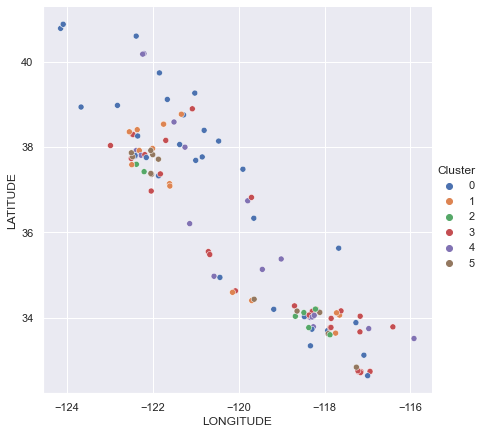

In [7]:
sns.relplot(
    x="LONGITUDE", y="LATITUDE", hue="Cluster", data=pltDf, height=6,
);

plt.savefig("cal_income.png")


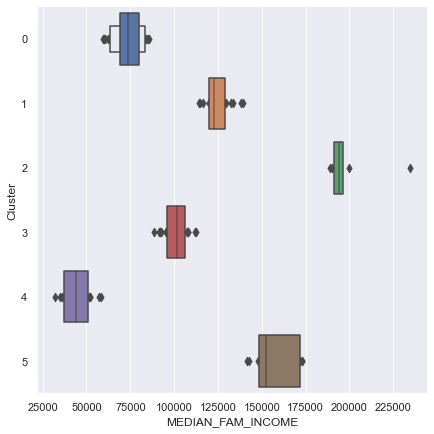

In [8]:
pltDf["MEDIAN_FAM_INCOME"] = pltDf["MEDIAN_FAM_INCOME"]
sns.catplot(x="MEDIAN_FAM_INCOME", y="Cluster", data=pltDf, kind="boxen", height=6);

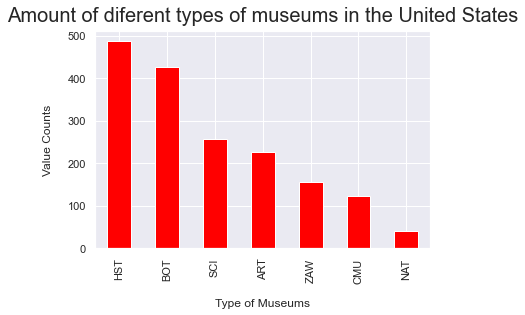

In [9]:
finalDf['DISCIPL'].value_counts().plot(kind='bar', color = 'red');
plt.xlabel("Type of Museums", labelpad=15)
plt.ylabel("Value Counts", labelpad=15)
plt.title("Amount of diferent types of museums in the United States", y=1.015, fontsize=20)
plt.savefig("plot1.png")

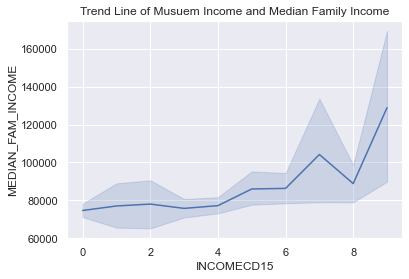

In [10]:
sns.set_theme(style="darkgrid")
finalDf['INCOMECD15'] = pd.to_numeric(finalDf['INCOMECD15'],errors='coerce')
sns.lineplot(x="INCOMECD15", y="MEDIAN_FAM_INCOME", data=finalDf).set(title='Trend Line of Musuem Income and Median Family Income')
plt.savefig("plot2.png")

In [11]:
finalDf['INCOMECD15'].replace(' ', np.nan, inplace=True)
finalDf.dropna(subset=['INCOMECD15'], inplace=True)
finalDf.shape 

(993, 15)

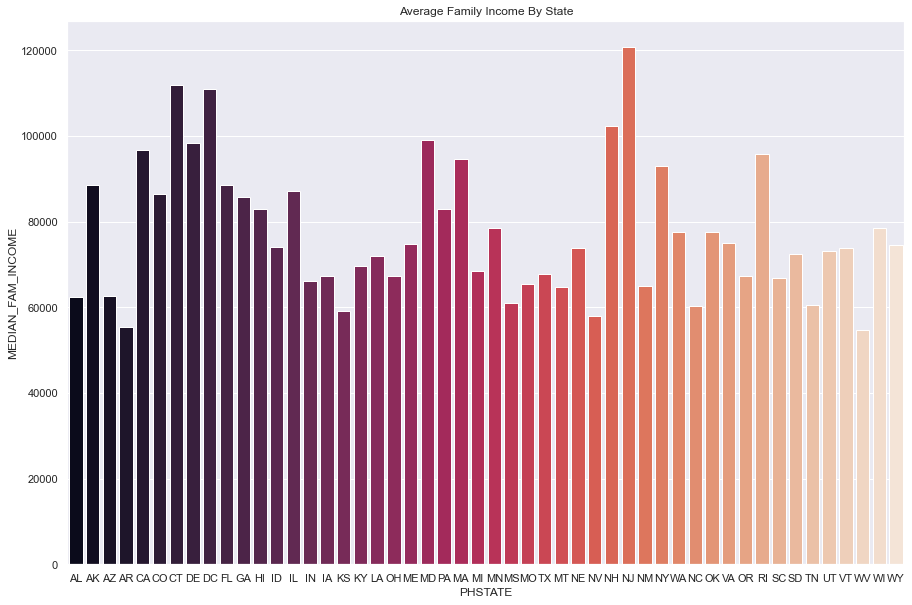

In [12]:
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(15,10)})
sns.barplot(x=finalDf['PHSTATE'], y=finalDf['MEDIAN_FAM_INCOME'], ci = None, palette="rocket").set(title='Average Family Income By State')
plt.savefig("plot3.png")